<a href="https://colab.research.google.com/github/MuhammadJundullah/Data-Analysis/blob/main/Car%20Fuel%20Consumption%20Analytics/Car%20Efficientest%20Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About Dataset

The "Vehicle Attributes and Emissions Dataset" contains comprehensive information on various vehicles manufactured in the year 2000. It includes details such as make, model, vehicle class, engine size, cylinder count, transmission type, and fuel type. Additionally, the dataset provides ranges for fuel consumption and CO2 emissions, offering insights into the environmental impact of each vehicle. The dataset encompasses a wide range of vehicle types, from compact to mid-size, and includes both conventional and high-performance models. With this information, analysts and researchers can study trends in vehicle characteristics, fuel efficiency, and emissions . This dataset serves as a valuable resource for understanding the automotive landscape and informing discussions on environmental sustainability and transportation policies.

https://www.kaggle.com/datasets/krupadharamshi/fuelconsumption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/gdrive")

pd.set_option("display.max_column", None)
sns.set_context("notebook")
sns.set_style("whitegrid")
sns.set_palette("Spectral")

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/gdrive


# Data Cleaning

In [2]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Fuel Consumption_Dataset/FuelConsumption.csv')
df.head(2)

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.0+ KB


In [4]:
df.nunique()

Year                  1
MAKE                 36
MODEL               328
VEHICLE CLASS        14
ENGINE SIZE          40
CYLINDERS             7
TRANSMISSION          8
FUEL                  5
FUEL CONSUMPTION    124
COEMISSIONS         116
dtype: int64

### Menghapus kolom year

In [5]:
df.drop(columns=['Year'], inplace=True)

In [6]:
df.describe()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.000000,639.000000,639.000000,639.000000
mean,3.265728,5.805947,14.713615,296.809077
std,1.231012,1.625588,3.307044,65.504178
min,1.000000,3.000000,4.900000,104.000000
25%,2.200000,4.000000,12.500000,253.000000
50%,3.000000,6.000000,14.400000,288.000000
75%,4.300000,6.000000,16.600000,343.000000
max,8.000000,12.000000,30.200000,582.000000


In [7]:
df.shape

(639, 9)

### Menghapus spasi pada nama kolom coemissions

In [8]:
df.rename(columns={'COEMISSIONS ': 'COEMISSONS'}, inplace=True)

# Data Eksploratory

### Melihat sebaran data numerik

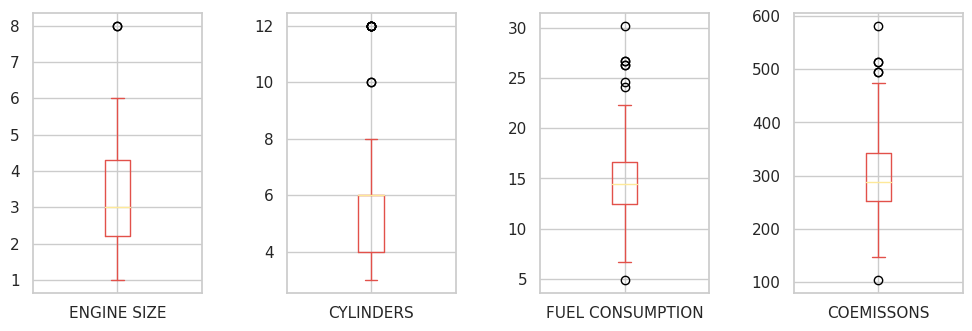

In [9]:
plot = df.select_dtypes(include=['int','float'])
plot.plot(subplots=True, layout=(2,4), kind='box', figsize=(12,8))
plt.subplots_adjust(wspace=(0.5))
plt.show()

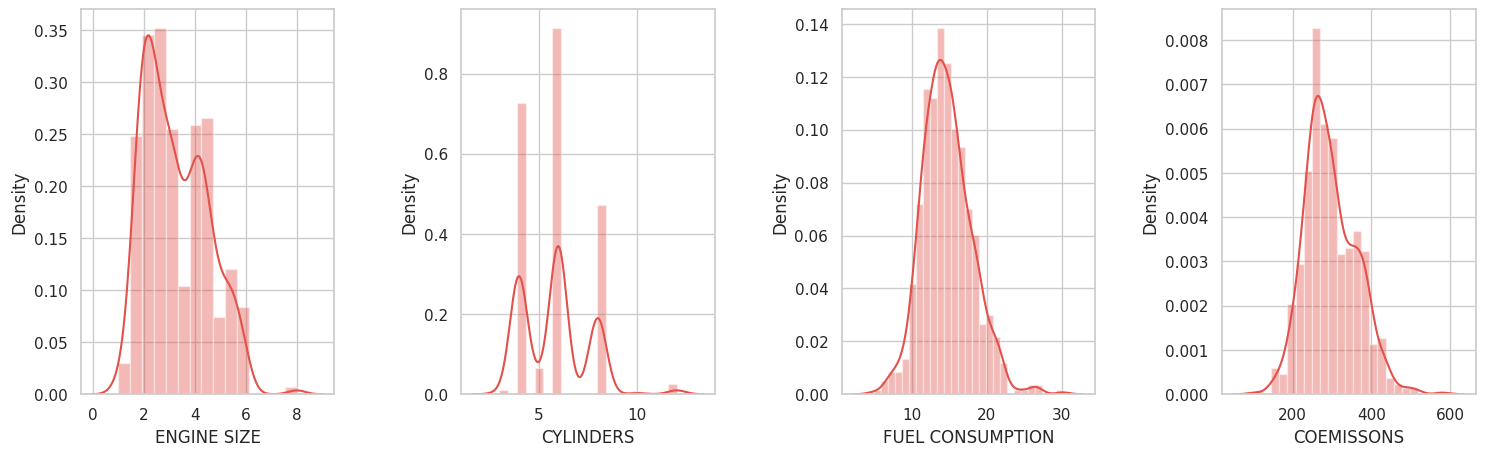

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5))

i = 0
for kolom in plot.columns:
    sns.distplot(df[kolom], ax=axs[i])
    i += 1

plt.subplots_adjust(wspace=0.5)

# Data Insight

### Mengidentifikasi mobil dengan engine size besar namun effisien dalam penggunaaan bahan bakar

In [11]:
df['EFFICIENCY'] = df['ENGINE SIZE'] / df['FUEL CONSUMPTION']
df_sorted = df.sort_values(by=['EFFICIENCY'], ascending=False)
df_sorted.head()

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSONS,EFFICIENCY
96,CHEVROLET,CORVETTE,SUBCOMPACT,5.7,8,M6,Z,14.4,278,0.395833
89,CHEVROLET,CAMARO,SUBCOMPACT,5.7,8,M6,Z,14.7,285,0.387755
466,PONTIAC,FIREBIRD/FORMULA,SUBCOMPACT,5.7,8,M6,Z,14.9,290,0.382550
465,PONTIAC,FIREBIRD/FORMULA,SUBCOMPACT,5.7,8,A4,Z,14.9,299,0.382550
208,DODGE,VIPER RT/10,SUBCOMPACT,8.0,10,M6,Z,21.4,396,0.373832


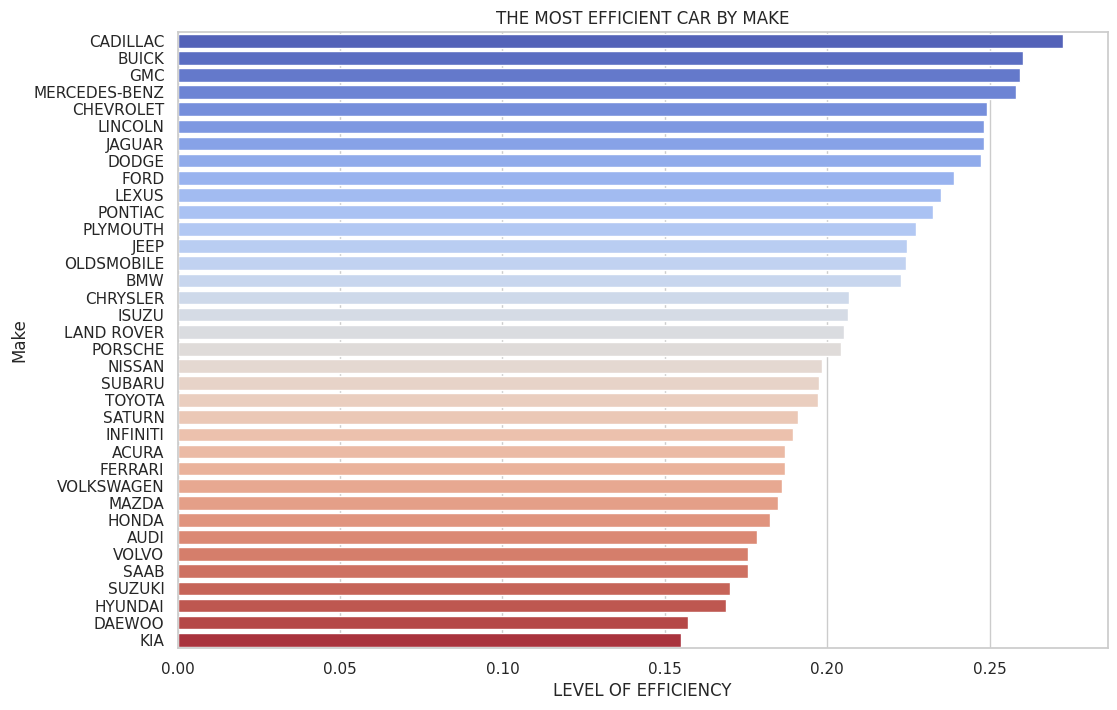

In [12]:
plt.figure(figsize=(12, 8))
eff = df.groupby("MAKE")["EFFICIENCY"].mean().sort_values(ascending=False)
sns.barplot(x=eff.values, y=eff.index, palette="coolwarm")
plt.title("THE MOST EFFICIENT CAR BY MAKE")
plt.xlabel("LEVEL OF EFFICIENCY")
plt.ylabel("Make")
plt.show()

### Kesimpulan :


*   Mobil dengan Merk Cadillac merupakan mobil yang rata rata paling effisien dimana memiliki penggunaan bahan bakar yang sedikit namun memiliki engine size yang cenderung tinggi.
*   Sebaliknya Mobil dengan Merk Kia merupakan mobil yang rata rata paling tidak effisien dimana memiliki penggunaan bahan bakar yang boros namun memiliki engine size yang cenderung kecil.



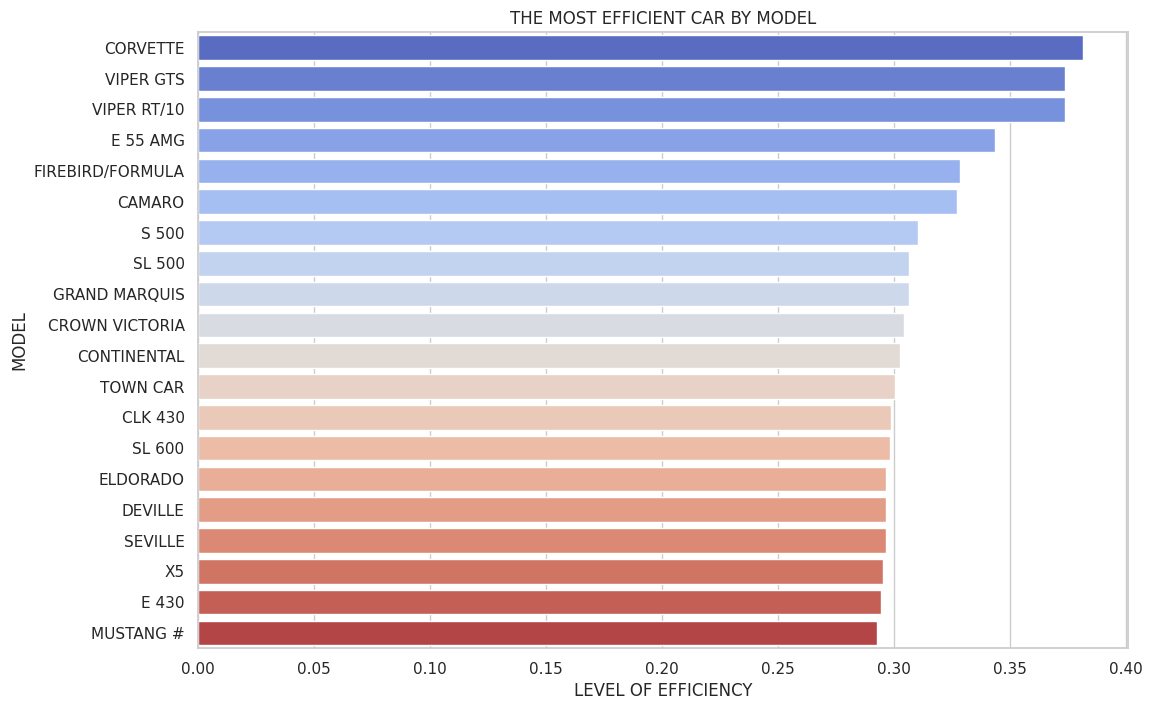

In [13]:
eff = df.groupby("MODEL")["EFFICIENCY"].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=eff.values, y=eff.index, palette="coolwarm")
plt.title("THE MOST EFFICIENT CAR BY MODEL")
plt.xlabel("LEVEL OF EFFICIENCY")
plt.show()

### Kesimpulan :


*   Mobil dengan Model Corvette merupakan mobil yang rata rata paling effisien dimana memiliki penggunaan bahan bakar yang sedikit namun memiliki engine size yang cenderung tinggi.

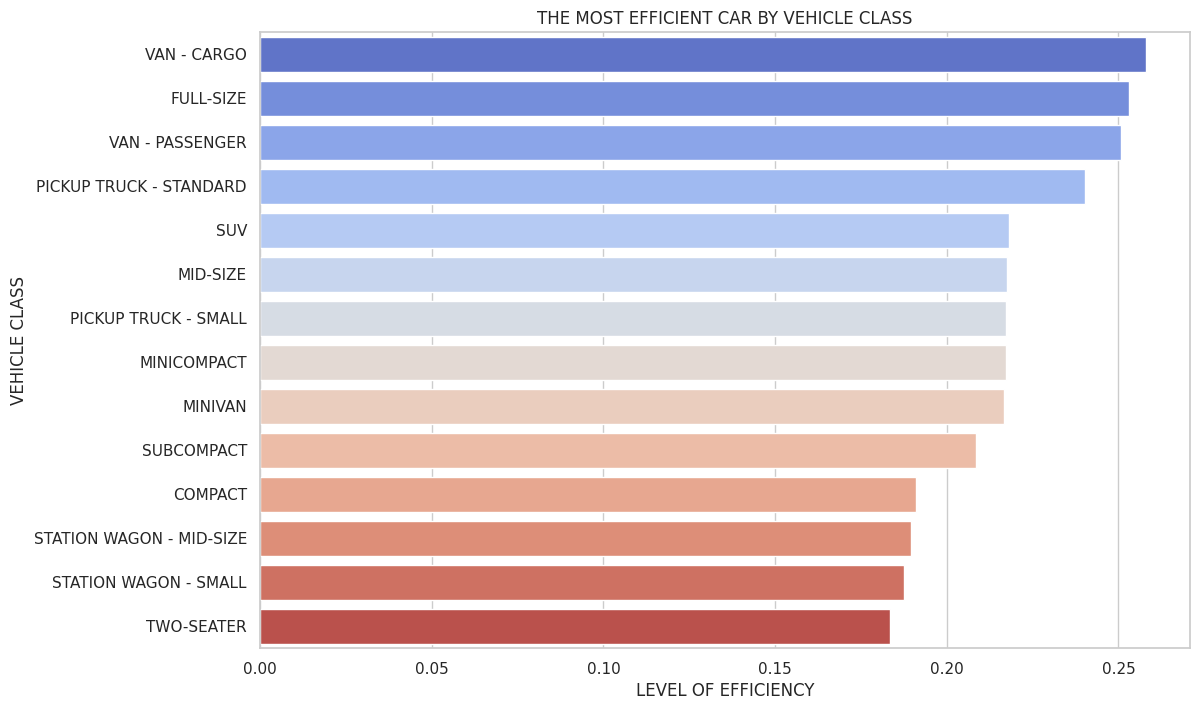

In [14]:
eff = df.groupby("VEHICLE CLASS")["EFFICIENCY"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=eff.values, y=eff.index, palette="coolwarm")
plt.title("THE MOST EFFICIENT CAR BY VEHICLE CLASS")
plt.xlabel("LEVEL OF EFFICIENCY")
plt.show()

### Kesimpulan :


*   Mobil dengan Vehicle Class Van - Cargo merupakan mobil yang rata rata paling effisien dimana memiliki penggunaan bahan bakar yang sedikit namun memiliki engine size yang cenderung tinggi.
*   Sebaliknya Mobil dengan Vehicle Class Two - Seater merupakan mobil yang rata rata paling tidak effisien dimana memiliki penggunaan bahan bakar yang boros namun memiliki engine size yang cenderung kecil.

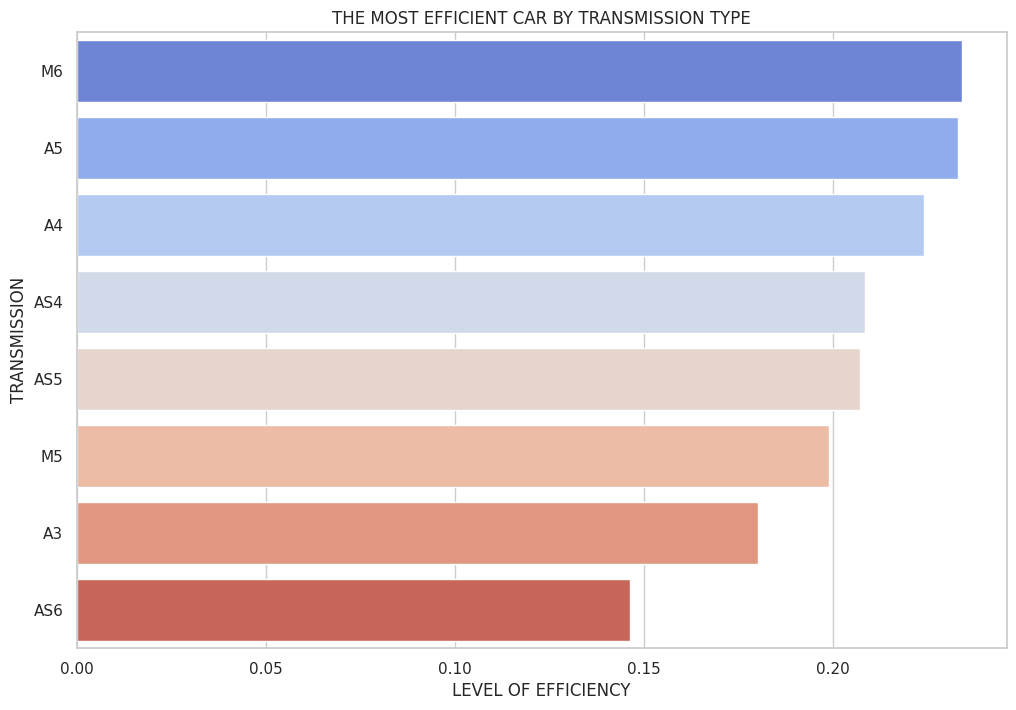

In [15]:
eff = df.groupby("TRANSMISSION")["EFFICIENCY"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=eff.values, y=eff.index, palette="coolwarm")
plt.title("THE MOST EFFICIENT CAR BY TRANSMISSION TYPE")
plt.xlabel("LEVEL OF EFFICIENCY")
plt.show()